In [1]:
import numpy as np
import pandas as pd

# Clase 2: Análisis Exploratorio de Datos (EDA) #

## Importando datos con Pandas ##

In [2]:
import os

DATA_FOLDER = 'datasets'
COVID_CSV = '200914COVID19MEXICO.csv'
COVID_URL = os.path.join('..', DATA_FOLDER, COVID_CSV)

In [3]:
print(COVID_URL)

..\datasets\200914COVID19MEXICO.csv


In [4]:
# Definir el tipo de dato hace el proceso más eficiente
types = {
    'SECTOR': np.int8,
    'SEXO': np.int8,
    'ENTIDAD_RES': np.int8,
    'FECHA_INGRESO': 'object',
    'FECHA_SINTOMAS': 'object',
    'FECHA_DEF': 'object',
    'INTUBADO': np.int8,
    'NEUMONIA': np.int8,
    'EDAD': np.int8,
    'NACIONALIDAD': np.int8,
    'EMBARAZO': np.int8,
    'DIABETES': np.int8,
    'EPOC': np.int8,
    'ASMA': np.int8,
    'INMUSUPR': np.int8,
    'HIPERTENSION':np.int8,
    'OTRA_COM': np.int8,
    'CARDIOVASCULAR': np.int8,
    'OBESIDAD': np.int8,
    'RENAL_CRONICA': np.int8,
    'TABAQUISMO': np.int8,
    'OTRO_CASO': np.int8,
    'RESULTADO': np.int8,
    'UCI': np.int8
}

In [5]:
# 'latin' porque contiene acentos
df = pd.read_csv(COVID_URL, encoding='latin', dtype=types)

In [6]:
df.head(10)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-09-14,063d1d,2,4,9,1,9,9,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-09-14,0ee9be,2,4,9,2,9,9,7,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-09-14,18ae31,2,4,15,1,15,15,58,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-09-14,02d970,2,4,13,2,13,13,76,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-09-14,05a196,2,4,12,2,20,12,29,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
5,2020-09-14,08f0e2,2,4,15,1,15,15,33,1,...,2,1,2,1,99,1,99,MÃ©xico,99,97
6,2020-09-14,100180,2,4,9,1,10,9,15,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
7,2020-09-14,1622ec,2,4,15,1,15,15,109,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
8,2020-09-14,18f860,2,3,2,1,2,2,2,2,...,2,2,2,2,1,1,99,MÃ©xico,99,2
9,2020-09-14,1057de,2,3,15,2,15,15,33,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97


In [7]:
# Los tipos que definimos se respetan. Los otros se intuyen (no de manera óptima)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520463 entries, 0 to 1520462
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   FECHA_ACTUALIZACION  1520463 non-null  object
 1   ID_REGISTRO          1520463 non-null  object
 2   ORIGEN               1520463 non-null  int64 
 3   SECTOR               1520463 non-null  int8  
 4   ENTIDAD_UM           1520463 non-null  int64 
 5   SEXO                 1520463 non-null  int8  
 6   ENTIDAD_NAC          1520463 non-null  int64 
 7   ENTIDAD_RES          1520463 non-null  int8  
 8   MUNICIPIO_RES        1520463 non-null  int64 
 9   TIPO_PACIENTE        1520463 non-null  int64 
 10  FECHA_INGRESO        1520463 non-null  object
 11  FECHA_SINTOMAS       1520463 non-null  object
 12  FECHA_DEF            1520463 non-null  object
 13  INTUBADO             1520463 non-null  int8  
 14  NEUMONIA             1520463 non-null  int8  
 15  EDAD           

### Estrategia para el análisis ###

* Eliminar campos que no nos sirven ahora: ID Registro, Municipio de procedencia, Origen, Entidad_UM, Fecha de Síntomas, País de Origen, País de Nacionalidad, Migrante, Otro Caso, Tipo de Paciente, Habla lengua indígena, Fecha de actualización.
* Indagar y trabajar más sobre campos útiles: Fecha de actualización, Fecha de defunción, Fecha de ingreso.
* Identificar preguntas que queremos responder
    * ¿Cuántos hombres y mujeres se infectaron o fallecieron?
    * ¿Qué estados han sufrido más por el COVID?
    * ¿Cómo ha ido avanzando la pandemia en México?
    * ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia?
    * ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
    * ¿Cuál es el efecto de las complicaciones presentadas en lso infectados?
    * ¿Cómo se distribuyen los infectados y fallecidos según en el espectro de edades?
    * ¿Existe alguna correlación entre el tiempo en morir y las edades?

### Limpiando datos ###
Limpiar involucra el proceso de convertir los datos a un formato legible y eficiente para su procesamiento. En nuestro caso, eliminaremos ciertos campos y registros innecesarios, además de cambiar el formato de algunas columnas.

In [8]:
# Eliminando columnas innecesarias
cols = ['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'ENTIDAD_UM', 'ENTIDAD_NAC',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'NACIONALIDAD', 'HABLA_LENGUA_INDIG',
       'OTRO_CASO', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN']
df.drop(cols, axis=1, inplace=True)

In [9]:
# Eliminamos registros no relacionados al COVID
rows = df[df.RESULTADO==2].index
df.drop(rows, inplace=True)

In [10]:
# La memoria se ha reducido drásticamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750266 entries, 0 to 1520462
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SECTOR          750266 non-null  int8  
 1   SEXO            750266 non-null  int8  
 2   ENTIDAD_RES     750266 non-null  int8  
 3   FECHA_INGRESO   750266 non-null  object
 4   FECHA_SINTOMAS  750266 non-null  object
 5   FECHA_DEF       750266 non-null  object
 6   INTUBADO        750266 non-null  int8  
 7   NEUMONIA        750266 non-null  int8  
 8   EDAD            750266 non-null  int8  
 9   EMBARAZO        750266 non-null  int8  
 10  DIABETES        750266 non-null  int8  
 11  EPOC            750266 non-null  int8  
 12  ASMA            750266 non-null  int8  
 13  INMUSUPR        750266 non-null  int8  
 14  HIPERTENSION    750266 non-null  int8  
 15  OTRA_COM        750266 non-null  int8  
 16  CARDIOVASCULAR  750266 non-null  int8  
 17  OBESIDAD        750266 non-n

In [11]:
# Transformamos datos de fecha a un formato más legible
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'], format='%Y-%m-%d')

### Transformando datos con apply() ###

In [12]:
# Ahora podemos saber el año, mes y día de forma más sencilla
df.iloc[5].FECHA_SINTOMAS.day # month, year

11

In [13]:
# FECHA_DEF no puede ser convertido directamente, debido a que posee fechas incorrectas ('9999-99-99')
fecha_modif = df.apply(lambda fila: '2000-01-01' if fila.FECHA_DEF=='9999-99-99' else fila.FECHA_DEF, axis='columns')

In [14]:
fecha_modif

0          2000-01-01
1          2000-01-01
2          2000-01-01
3          2020-04-27
4          2020-04-06
              ...    
1520458    2000-01-01
1520459    2000-01-01
1520460    2000-01-01
1520461    2000-01-01
1520462    2000-01-01
Length: 750266, dtype: object

In [15]:
df['FECHA_DEF'] = fecha_modif

In [16]:
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'], format='%Y-%m-%d')

In [17]:
df.info() # Podríamos mejorar el uso de memoria por datetime en un futuro

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750266 entries, 0 to 1520462
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   SECTOR          750266 non-null  int8          
 1   SEXO            750266 non-null  int8          
 2   ENTIDAD_RES     750266 non-null  int8          
 3   FECHA_INGRESO   750266 non-null  object        
 4   FECHA_SINTOMAS  750266 non-null  datetime64[ns]
 5   FECHA_DEF       750266 non-null  datetime64[ns]
 6   INTUBADO        750266 non-null  int8          
 7   NEUMONIA        750266 non-null  int8          
 8   EDAD            750266 non-null  int8          
 9   EMBARAZO        750266 non-null  int8          
 10  DIABETES        750266 non-null  int8          
 11  EPOC            750266 non-null  int8          
 12  ASMA            750266 non-null  int8          
 13  INMUSUPR        750266 non-null  int8          
 14  HIPERTENSION    750266 non-null  in

### Salvemos los datos ###

In [18]:
CLEAN_COVID_FILENAME = 'Clean_Covid_Dataset.csv'
CLEAN_COVID_URL = os.path.join('..', DATA_FOLDER, CLEAN_COVID_FILENAME)
print(CLEAN_COVID_URL)
df.to_csv(CLEAN_COVID_URL)

..\datasets\Clean_Covid_Dataset.csv


### Indexado Jerárquico: Índices que tienen índices ###

In [19]:
df1 = df.copy()

### Agrupaciones y Agregaciones ###
En esta sección responderemos las preguntas
* ¿Cuántos hombres y mujeres se infectaron o fallecieron?
* ¿Qué estados han sufrido más por el COVID?
* ¿Cómo ha ido avanzando la pandemia en México?
* ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia?
* ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
* ¿Qué tipo de complicaciones presentaron los hospitalizados?

#### ¿Cuántos hombres y mujeres se infectaron o fallecieron? ####

In [20]:
# Agrupemos por sexo y luego por resultado
covid_por_genero = df['RESULTADO'].groupby([df['SEXO'], df['RESULTADO']]).count()
covid_por_genero

SEXO  RESULTADO
1     1            321474
      3             39823
2     1            350242
      3             38727
Name: RESULTADO, dtype: int64

#### ¿Qué estados han sufrido más por el COVID? ####

In [21]:
# Agrupamos por estado y luego por resultado
covid_por_estado = df['RESULTADO'].groupby([df['ENTIDAD_RES'], df['RESULTADO']]).count()
covid_por_estado

ENTIDAD_RES  RESULTADO
1            1             6441
             3              229
2            1            18346
             3              899
3            1             9033
                          ...  
30           3             2260
31           1            16729
             3              357
32           1             6409
             3               87
Name: RESULTADO, Length: 64, dtype: int64

#### ¿Cómo ha ido avanzando la pandemia en México? ####

In [22]:
# ¿Cómo ha ido avanzando la pandemia en México?
covid_por_mes = df['RESULTADO'].groupby([df['FECHA_INGRESO'], df['RESULTADO']]).count()
covid_por_mes

FECHA_INGRESO  RESULTADO
2020-01-13     1               1
2020-01-29     1               1
2020-01-30     3               1
2020-02-07     3               1
2020-02-24     1               1
                            ... 
2020-09-12     1             419
               3            4024
2020-09-13     1             114
               3            2275
2020-09-14     3             365
Name: RESULTADO, Length: 383, dtype: int64

#### ¿Cuál ha sido el rendimiento de los diferentes sistemas de salud durante la pandemia? ####

In [23]:
covid_por_sistema = df['RESULTADO'].groupby([df['SECTOR'], df['RESULTADO']]).count()
covid_por_sistema

SECTOR  RESULTADO
1       1                54
        3                 3
2       1               452
        3                 5
3       1             13108
        3               648
4       1            212232
        3             15968
5       1              5288
        3               536
6       1             28839
        3              2424
7       1               568
        3                44
8       1              7165
        3               126
9       1             20949
        3             13623
10      1              4246
        3               684
11      1              4806
        3              1197
12      1            373602
        3             43173
13      1               407
        3               119
Name: RESULTADO, dtype: int64

### Concatenando DataFrames ###
Aquí respondemos las preguntas:
* ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID?
* ¿Cuál es el efecto de las complicaciones presentadas en lso infectados?

#### ¿Cuál es el efecto de enfermedades existentes en los infectados de COVID? ####

In [24]:
df['FALLECIDO'] = df.apply(lambda x: 0 if x.FECHA_DEF.year==2000 else 1, axis='columns')

In [25]:
# No podemos agrupar en una sóla línea porque las enfermedades están en varias columnas
covid_por_hiper = df[df['HIPERTENSION']==1][['HIPERTENSION']].groupby([df['FALLECIDO']]).count()
covid_por_hiper

,HIPERTENSION
FALLECIDO,
0,109262
1,32654


In [26]:
covid_por_hiper = covid_por_hiper.T
covid_por_hiper

FALLECIDO,0,1
HIPERTENSION,109262,32654


In [27]:
covid_por_cardio = df[df['CARDIOVASCULAR']==1][['CARDIOVASCULAR']].groupby(df['FALLECIDO']).count()
covid_por_cardio

,CARDIOVASCULAR
FALLECIDO,
0,10854
1,3918


In [28]:
covid_por_cardio = covid_por_cardio.T
covid_por_cardio

FALLECIDO,0,1
CARDIOVASCULAR,10854,3918


In [29]:
covid_por_hiper.append(covid_por_cardio)

FALLECIDO,0,1
HIPERTENSION,109262,32654
CARDIOVASCULAR,10854,3918


Diseñamos una función que haga el proceso de concatenado por nosotros

In [30]:
enfermedades = ['EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRA_COM']

In [31]:
# Diseñamos una función que lo haga por nosotros
def resultadoPorAfeccion(datos, afecciones):
    res = 0
    isFirst = True
    for afec in afecciones:
        a = df[df[afec]==1][[afec]].groupby([df['FALLECIDO']]).count()
        a = a.T
        if (isFirst):
            res = a
            isFirst = False
        else:
            res = res.append(a)
    return res

In [32]:
covid_por_enf = resultadoPorAfeccion(df, enfermedades)
covid_por_enf

FALLECIDO,0,1
EMBARAZO,5606,72
DIABETES,85081,27950
EPOC,7247,3527
ASMA,17835,1462
INMUSUPR,6464,1811
HIPERTENSION,109262,32654
CARDIOVASCULAR,10854,3918
OBESIDAD,114122,17822
RENAL_CRONICA,8904,5118
TABAQUISMO,48838,5829


#### ¿Cuál es el efecto de las complicaciones presentadas en lso infectados? ####

In [33]:
complicaciones = ['INTUBADO', 'NEUMONIA', 'UCI']

In [34]:
covid_por_comp = resultadoPorAfeccion(df, complicaciones)
covid_por_comp

FALLECIDO,0,1
INTUBADO,6364,24794
NEUMONIA,81390,54209
UCI,8086,7460


### Binning: Pasando datos numéricos a categóricos ###
En esta sección responderemos la pregunta
* ¿Cómo se distribuyen los infectados y fallecidos según en el espectro de edades?

La discretización es el proceso de convertir variables una variable continua (números con decimales) a una discreta (números enteros).   
Podríamos usar otra vez apply() para crear un campo nuevo 'RANGO_EDAD' basado en lo contenido dentro del campo 'EDAD', pero Pandas ya viene con una función para hacer todo ese trabajo más fácil.

In [35]:
df['RANGO_EDAD'] = pd.cut(df['EDAD'], [0,12,19,29,50,65,np.inf], labels=range(6), right=False)

In [36]:
covid_por_edades = df[['RANGO_EDAD']].groupby([df['RANGO_EDAD'], df['RESULTADO']]).count()
covid_por_edades

RANGO_EDAD
RANGO_EDAD RESULTADO            
0          1                9257
           3                2127
1          1               12487
           3                2560
2          1               91578
           3               13469
3          1              308622
           3               35610
4          1              161040
           3               16351
5          1               88732
           3                8433

### Correlaciones ###
Respondemos la pregunta
* ¿Existe alguna correlación entre el tiempo en morir y las edades?

In [37]:
def calcularDiasVivo(fila):
    tiempo = 0
    if (fila.FALLECIDO==1):
        tiempo = fila.FECHA_DEF - fila.FECHA_SINTOMAS
        tiempo = tiempo.days
    return tiempo

In [38]:
df['DIAS_VIVO'] = df.apply(calcularDiasVivo, axis='columns')

In [39]:
# Coeficientes de Correlacion Lineal
df[df['FALLECIDO']==1][['EDAD', 'DIAS_VIVO']].corr()

,EDAD,DIAS_VIVO
EDAD,1.000000,-0.036369
DIAS_VIVO,-0.036369,1.000000


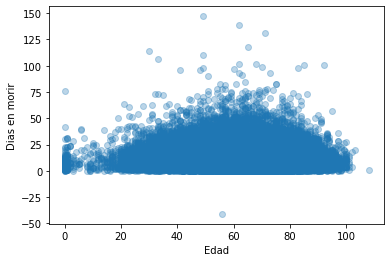

In [40]:
import matplotlib.pyplot as plt

# Las graficas siempre se muestran en Jupyter, aunque usar plt.show() es necesario en otros entornos
x = df[df['FALLECIDO']==1]['EDAD']
y = df[df['FALLECIDO']==1]['DIAS_VIVO']
plt.scatter(x=x, y=y, alpha=0.3)
plt.xlabel('Edad')
plt.ylabel('Dias en morir')
plt.show()

### Otras cosas más que aprender de Pandas ###
Pandas puede hacer una multitud de tareas
* Unir dos o más DataFrames según diferentes reglas
* Reordenar los registros según condiciones específicas
* Indexado Jerárquico: Columnas que tienen columnas
* Manejo más eficiente de memeoria y CPU, usando librerías oomo Spark, etc
* Tablas de Pivote
* Integración con otras librerías, como scikit-learn
* Análisis de series de tiempo

# Clase 2 Visualización de Datos #
En esta clase aprenderemos a crear gráficos personalizados en Matplotlib a partir de datos en Pandas.

## Creando y salvando gráficos ##


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic') # Existen muchos estilos

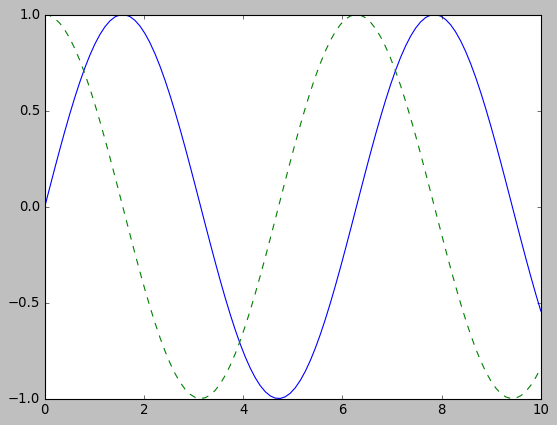

In [42]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

In [43]:
IMGS_FOLDER = os.path.join('..', 'imgs')
if not os.path.exists(IMGS_FOLDER): os.mkdir(IMGS_FOLDER)
IMG1_URL = os.path.join(IMGS_FOLDER, '1.png')
fig.savefig(IMG1_URL)

In [44]:
!dir ..\imgs

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: E854-2EA9

 Directorio de C:\Users\Sebasti n\Desktop\MLDiv\data-analysis-workshop-mldiv\imgs

07/10/2020  11:42 p. m.    <DIR>          .
07/10/2020  11:42 p. m.    <DIR>          ..
08/10/2020  09:52 p. m.            38,526 1.png
07/10/2020  11:42 p. m.           277,239 mapa_top.png
               2 archivos        315,765 bytes
               2 dirs  86,944,550,912 bytes libres


## Sintáxis básica ##

### Estructuras básicas ###
* Figure: Figura que contiene todo los gráficos, anotaciones y texto
* Axis: Gráfica en sí, con cierta configuración hecha

### MATLAB ###
La gráfica se encuentra en memoria, y debido a que plt() es stateful, cada llamada modificará la última gráfica en memoria. No existe una forma de modificar gráficas ya hechas.

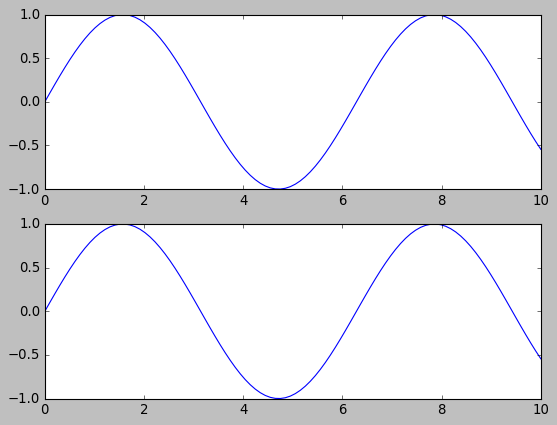

In [45]:
# FIGURA con dos gráficas
plt.figure() # creación de figura

plt.subplot(2, 1, 1) # (filas, columnas, no. de panel)
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))

### Orientada a objetos ###
La llamada a figure() devuelve referencias a objetos en memoria, por lo que se pueden modificar una vez creados.

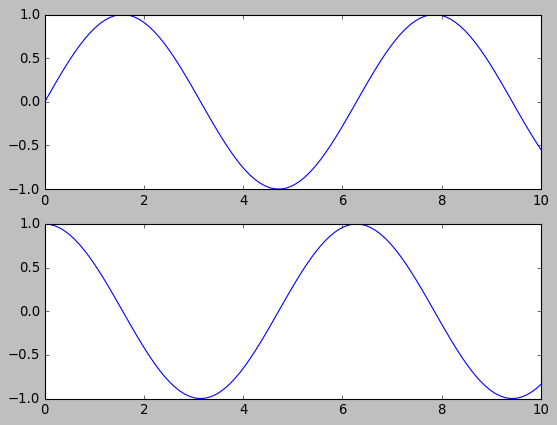

In [46]:
# FIGURA con dos gráficas
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

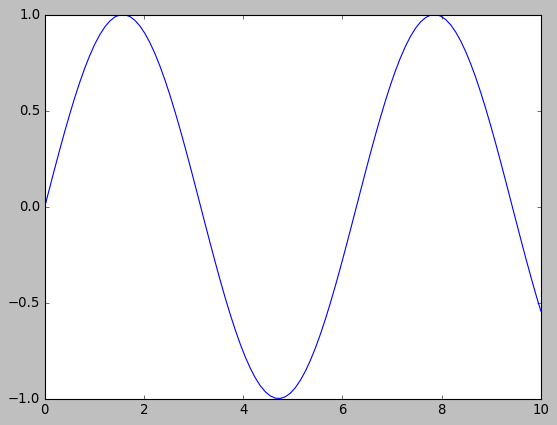

In [47]:
# Se puede usar así también
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x))

### Estilos ###

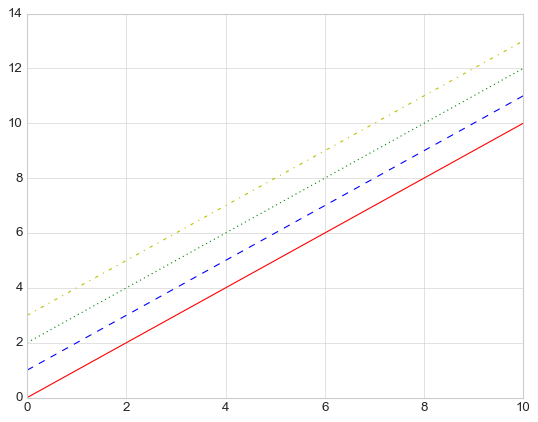

In [48]:
plt.style.use('seaborn-whitegrid')
plt.figure()

# Color y tipo de línea pueden ser expresados diferentemente
plt.plot(x, x, color='red', linestyle='solid')
plt.plot(x, x + 1, color='b', linestyle='dashed') # blue (rgbcmyk)
plt.plot(x, x + 2, color='g', linestyle=':') # dotted (-, --, :, -.)
plt.plot(x, x + 3, '-.y') # yellow y dashdot

### Ejes ###

(0.0, 10.0, -0.9993845576124357, 0.9996923408861117)

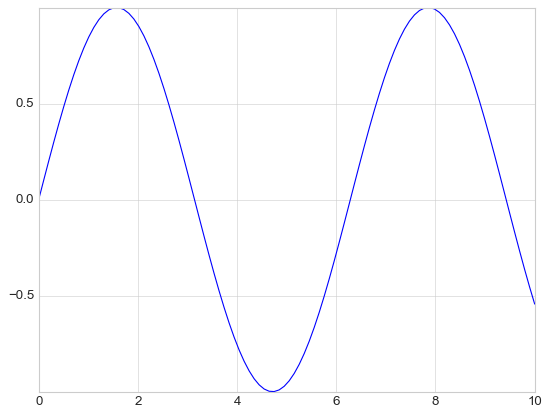

In [49]:
plt.plot(x, np.sin(x))

# Puedes establecer límites
plt.xlim(-2, 12)
plt.ylim(-2, 15)
# O elegir entre estilos predeterminados
plt.axis('tight') # o 'equal'

### Etiquetas y leyendas ###

(0.0, 10.0, -1.0, 1.0)

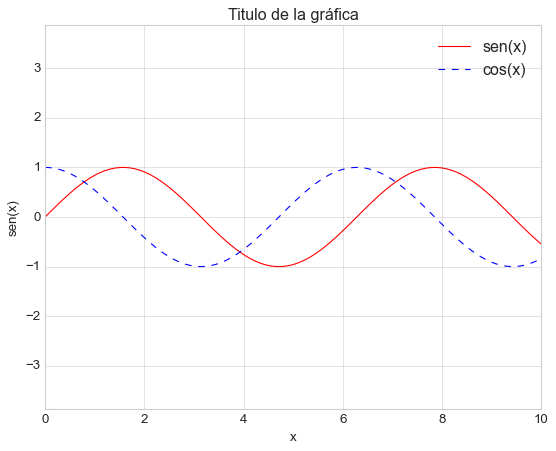

In [50]:
plt.plot(x, np.sin(x), '-r', label='sen(x)')
plt.plot(x, np.cos(x), '--b', label='cos(x)')
plt.title('Titulo de la gráfica')
plt.xlabel('x')
plt.ylabel('sen(x)')
plt.legend()

plt.axis('equal')

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sen(x)'),
 Text(0.5, 1.0, 'Gráfica')]

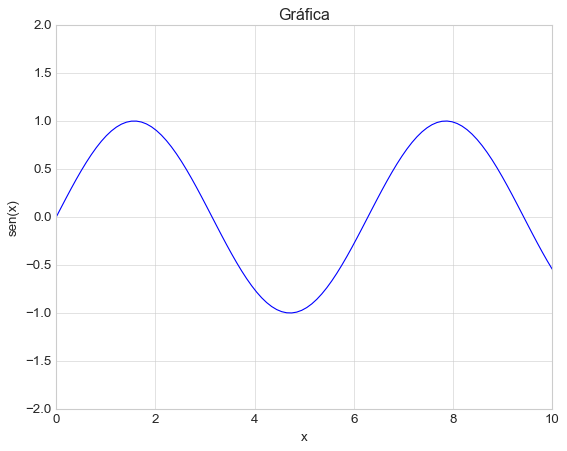

In [51]:
# Todo lo anterior se hace en POO de la sig. manera
ax = plt.axes()
ax.plot(x, np.sin (x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
      xlabel='x', ylabel='sen(x)',
      title='Gráfica')

## Diferentes tipos de gráficas ##

### Gráficos de dispersión ###

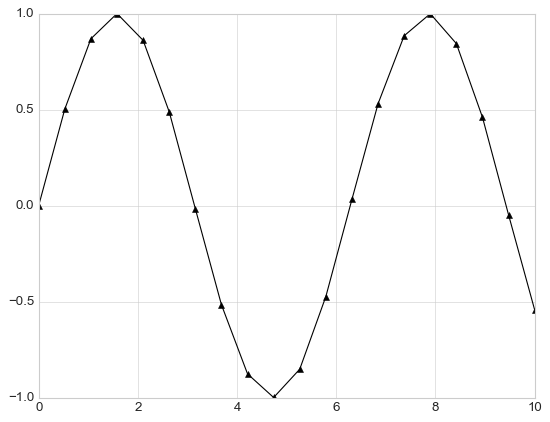

In [52]:
plt.style.use('seaborn-whitegrid')

x = np.linspace(0, 10, 20)
y = np.sin(x)

# linea,marca,color
plt.plot(x, y, '-^k') # Varios tipos: (o . ^ s d p x +)

(-1.2, 1.2)

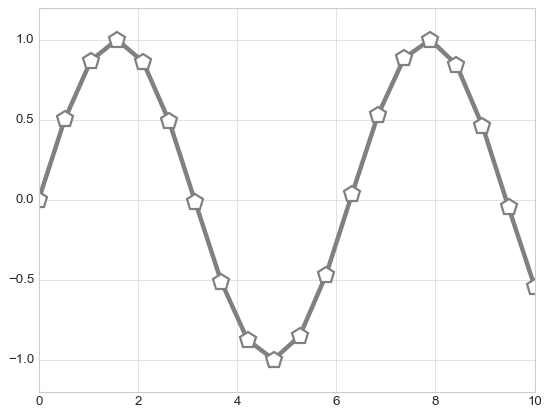

In [53]:
# Más personalización
plt.plot(x, y, '-p', color='gray', linewidth=4,
         markersize=15, markerfacecolor='white',
         markeredgecolor='gray', markeredgewidth=2)
plt.ylim(-1.2, 1.2)

#### Más opciones con plt.scatter ####
Permite que cada punto tenga su propia configuración personalizda, incluyendo colores, tamaños, transparencia, etc. Esencial cuando queremos visualizar instancias de datos.   
Sin embargo, es más lento, por lo que sólo debe utilizarse de ser necesario

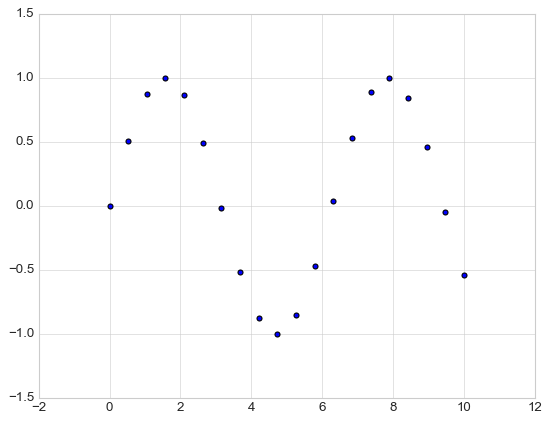

In [54]:
plt.scatter(x, y, marker='o')

In [55]:
# Dataset Iris, muy popular en análisis de datos
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape) # 150 instancias, 4 características
features = iris.data.T # Transponemos para mejor manejo

(150, 4)


Text(0.5, 1.0, 'Instancias de flores Iris')

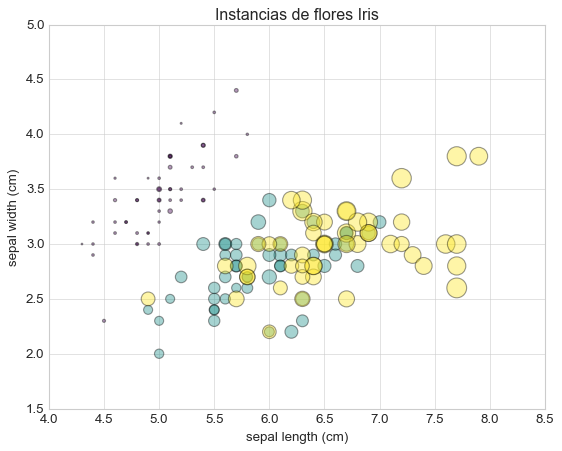

In [56]:
# Cada punto tiene su propia configuración
areas = features[2] * features[3] * 20 # size está en puntos
plt.scatter(features[0], features[1], alpha=0.4,
           s=areas, c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Instancias de flores Iris')

### Histogramas ###

In [70]:
data = np.random.randn(1000)

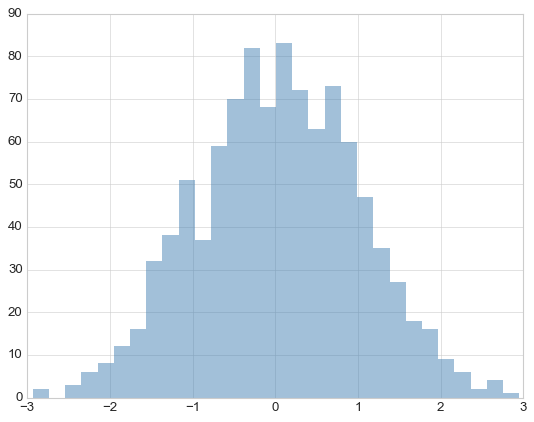

In [80]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')
plt.show()

In [84]:
# Manera más rápida de contar cuántas instancias existen en cada barra
counts, bi_edges = np.histogram(data, bins=5)
print(counts)

[ 31 233 438 260  38]


In [104]:
x1 = np.random.normal(0, 0.5, 1000)
x2 = np.random.normal(-2, 1.5, 1000)
x3 = np.random.normal(3, 2, 1000)

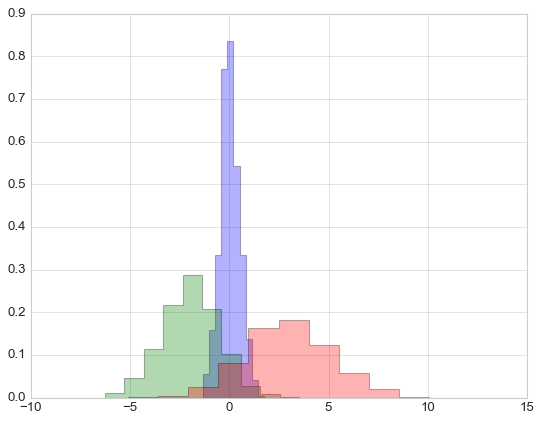

In [112]:
# Sin density=True, los histogramas son engañosos, debido a que mientras
# mas varianza exista, el ancho de la barra se reduce
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=10)

# Poner ** desempaca el dic. como si las llaves=valores 
# se estuvieran declarando como parte de la firma de la función
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.show()

In [106]:
c1, _ = np.histogram(x1, bins=10)
c2, _ = np.histogram(x2, bins=10)
c3, _ = np.histogram(x3, bins=10)
c1, c2, c3

(array([ 17,  49, 104, 240, 260, 169, 104,  43,  13,   1], dtype=int32),
 array([ 11,  44, 112, 212, 282, 203,  99,  26,   9,   2], dtype=int32),
 array([  1,   7,  37, 124, 249, 275, 186,  86,  32,   3], dtype=int32))

#### Histogramas de dos dimensionaes ####

In [114]:
# Creamos datos aleatorios (se devuelven las absisas y ordenadas de cada instancia)
mean, cov = [0, 0], [[1, 1], [1, 2]]
# Se utiliza la transpuesta porque el vector está en forma vertical
x, y = np.random.multivariate_normal(mean, cov, 10000).T

array([-1.77779607,  1.09243014,  0.30916486, ...,  0.05191176,
        0.43369098,  1.75401161])

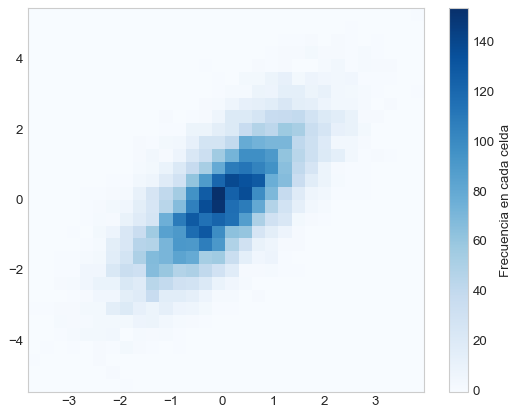

In [116]:
# bins denota la cantidad de espacios por cada eje. En total existen
# 30 x 30 celdas/espacios
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Frecuencia en cada celda')

In [119]:
# Para saber más rápido los números
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
counts.shape

(30, 30)

#### Estimación de la densidad del kernel ####

In [127]:
from scipy.stats import gaussian_kde

data = np.vstack([x, y]) # data.shape == (2, 10000)
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

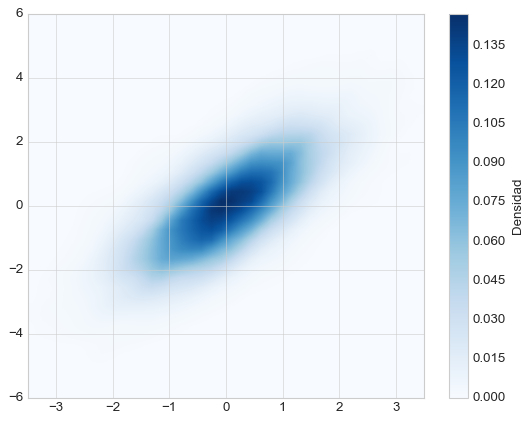

In [128]:
# Usamos imshow para poder usar gradientes
plt.imshow(Z.reshape(Xgrid.shape), origin='lower',
          aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label('Densidad')

Otras opciones para hacer KDE:   
* sklearn.neighboors.KernelDensity
* statsmodels.nonparametric.kernel_density.KDEMultivariate   

Para visualización, Seaborn es reomendado

### Personalizando Leyendas ###

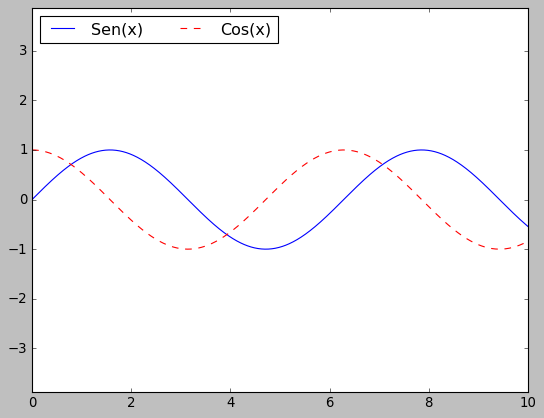

In [136]:
plt.style.use('classic')

x = np.linspace(0, 10, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sen(x)')
ax.plot(x, np.cos(x), '--r', label='Cos(x)')
ax.axis('equal')
# Lugar, Marco y Columnas
leg = ax.legend(loc='upper left', frameon=True, ncol=2)

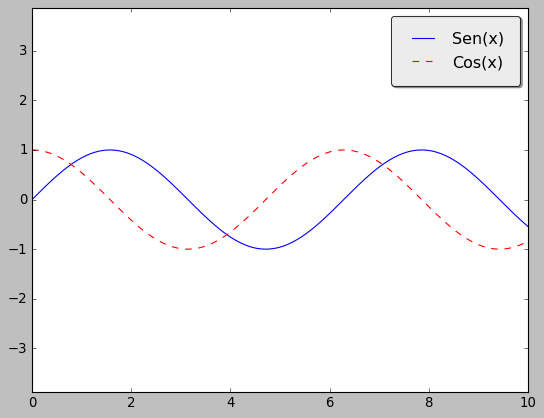

In [135]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sen(x)')
ax.plot(x, np.cos(x), '--r', label='Cos(x)')
ax.axis('equal')
# Cuadro redondeado, Transparencia, Sombra y Marco
leg = ax.legend(fancybox=True, framealpha=0.8, shadow=True,
               borderpad=1)

#### Tamaños en leyendas ####

In [162]:
x = np.random.uniform(0, 10, 100)
y = np.random.uniform(0, 10, 100)
areas = np.random.uniform(100, 1000, 100)
pop = np.random.uniform(10000, 100000, 100)

Text(0.5, 1.0, 'Ciudades')

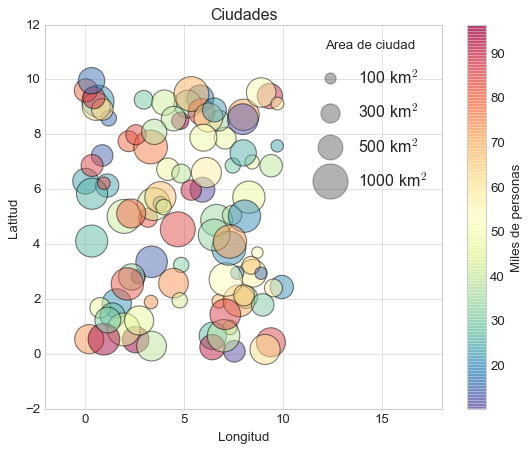

In [176]:
plt.style.use('seaborn-whitegrid')
plt.scatter(x, y, s=areas, c=pop/1000, 
            cmap='Spectral_r', alpha=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.xlim([-2, 12])
plt.xlim([-2, 18])
plt.colorbar(label='Miles de personas')

# Fingimos graficar puntos especificos
for area in [100, 300, 500, 1000]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
               label=f'{area} km$^2$')

plt.legend(scatterpoints=1, frameon=False, title='Area de ciudad',
          labelspacing=1)
plt.title('Ciudades')

### Mapas discretos de colores ###

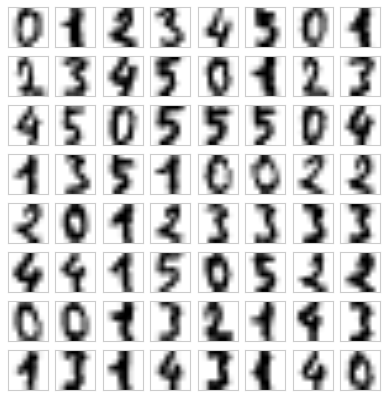

In [179]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [180]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

In [181]:
projection.shape # 1083 instancias, coordenada

(1083, 2)

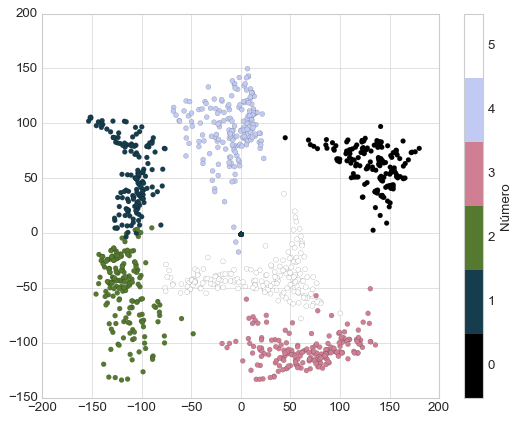

In [185]:
# Usa get_map(mapa, no. de secciones)
plt.scatter(projection[:,0], projection[:,1], lw=0.1,
           c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='Número')
plt.clim(-0.5, 5.5) # color limit

### Múltiples gráficas ###

In [186]:
plt.style.use('seaborn-white')

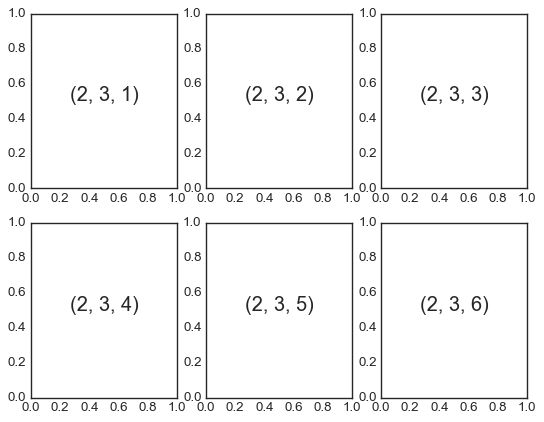

In [187]:
# Interface MATLAB
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

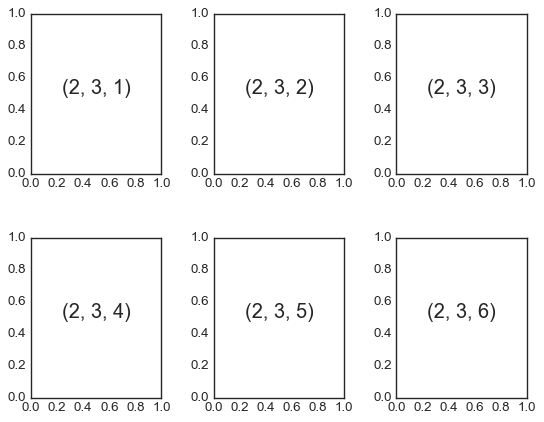

In [188]:
# Interface POO
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

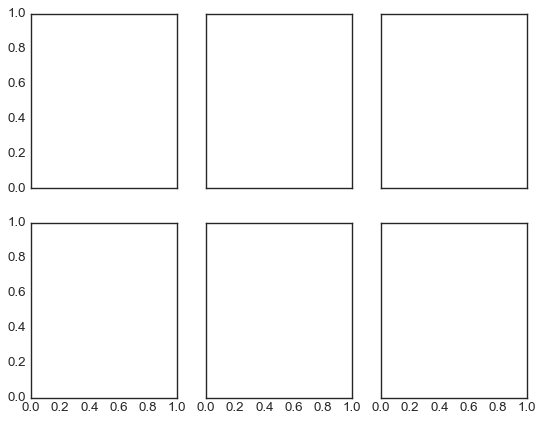

In [190]:
# De sopetón
# sharax y sharay eliminan anotaciones de los ejes internos
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

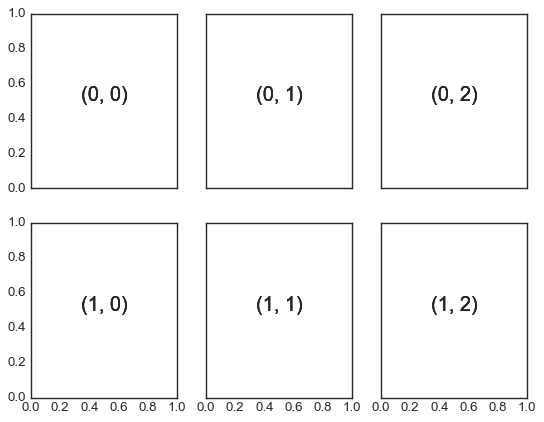

In [193]:
# For FILAS for COLUMNAS
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig # Nótese el fig en notación POO

#### GridSpec ####

In [194]:
# "Espacios" disponibles en un grilla
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

<AxesSubplot:>

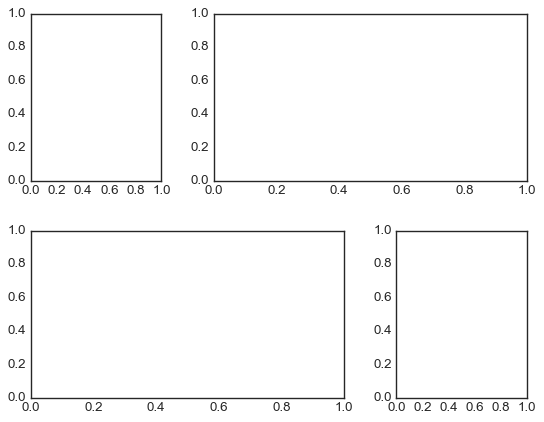

In [195]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:]) # Usa los ultimos dos espacios...
plt.subplot(grid[1, :2]) # ...o los dos primeros
plt.subplot(grid[1, 2])

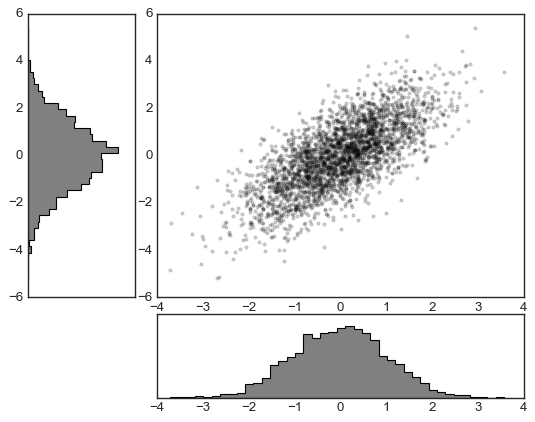

In [210]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

fig = plt.figure()
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])
# sharey y sharex pueden apuntar a un subplot también
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
# x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
# y_hist.invert_xaxis()
plt.show()

### Textos y Anotaciones ###

Text(0.2, 0.2, '. Fig: (0.2, 0.2)')

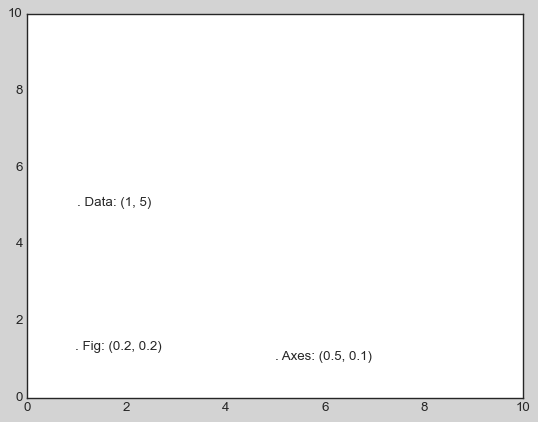

In [212]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# Coords. relativas a datos, axes y la figura en su totalidad
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Fig: (0.2, 0.2)", transform=fig.transFigure)

### Ticks ###

#### Hiding tick in image plots ####

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Sebastián\scikit_learn_data


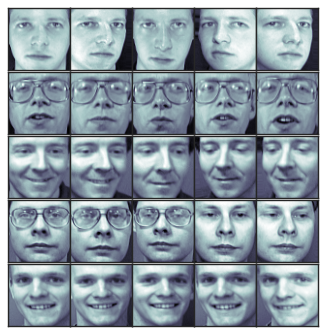

In [214]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

fig, ax = plt.subplots(5, 5, figsize=(5,5))
fig.subplots_adjust(hspace=0, wspace=0)

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='bone')

#### Crowded ticks ####

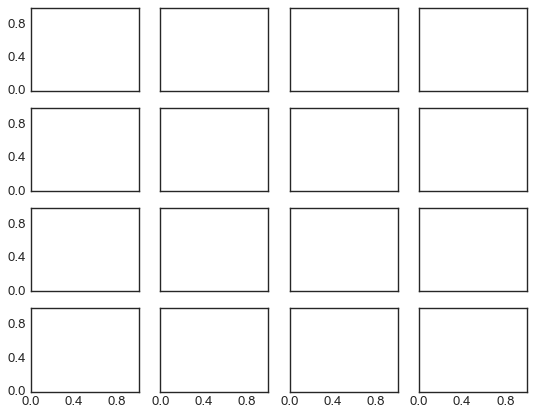

In [218]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

for axi in ax.flat:
    # Máximo 3 ticks por subplot
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

#### Custom ticks ####

In [ ]:
def format_func(value, tick_number):
    N = int(np.round(2 * value / np.pi))
    if N == 0: return '0'
    elif N == 1: return '1'
    elif N == 1: return '2'
    elif N == 1: return '3'

In [ ]:
fig, ax =plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sen(x)')
ax.plot(x, np.cos(x), lw=3, label='Cos(x)')

ax.legend()

ax.xaxis.set_major_locator(plt.FuncFormatter(format_func))

### Estilos ###

### Gráficos de pastel ###

In [57]:
# Catálogos de cada campo
catalogo = {
    'SEXO': { 1: 'MUJER', 2: 'HOMBRE' },
    'SI_NO': { 0: 'NO', 1: 'SI'},
    'RESULTADO': { 1: 'ACTIVO', 3: 'SOSPECHOSO'}
}

### Gráficos de contorno ###

In [58]:
def altura(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50) # Más espacios resultan en gráficas más suaves
y = np.linspace(0, 5, 50)


X, Y = np.meshgrid(x, y) # Crea matrices representando x y y en un plano
Z = altura(X, Y)

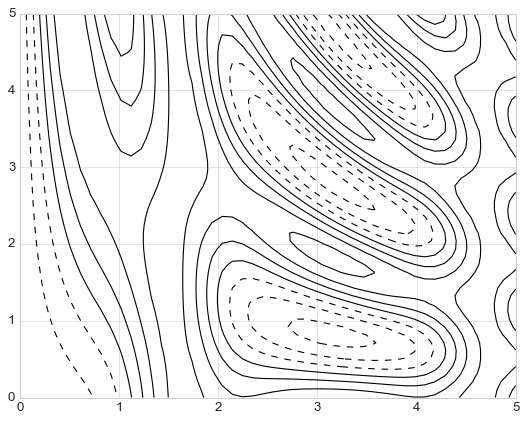

In [59]:
# Las líneas punteadas son valores negativos
plt.contour(X, Y, Z, colors='black')

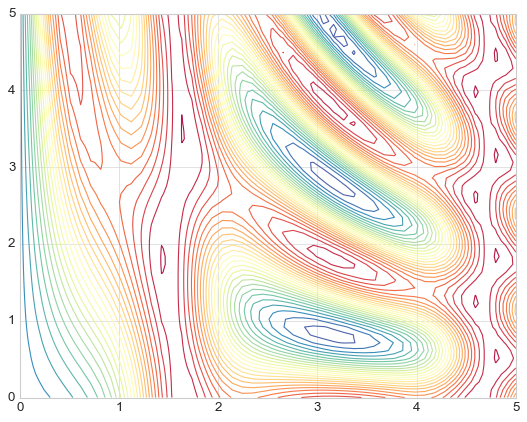

In [60]:
# levels define el número máximo de líneas dibujadas
plt.contour(X, Y, Z, levels=30, cmap='Spectral_r') # la r a final indica "al revés"

#### Rellenando espacio entre contornos con contourf() ####

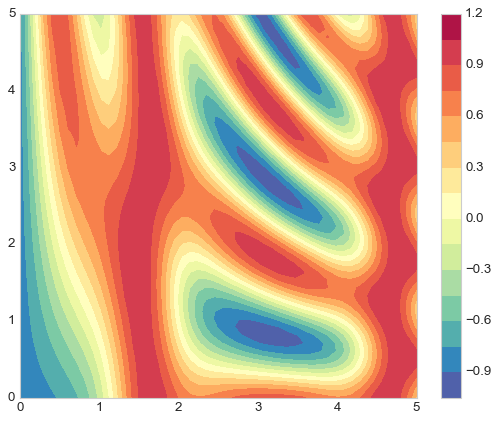

In [61]:
# La gráfica es más nítida, no necesita tantas líneas
plt.contourf(X, Y, Z, 15, cmap='Spectral_r')
plt.colorbar()

#### Usando plt.imshow() para gradientes de color ####

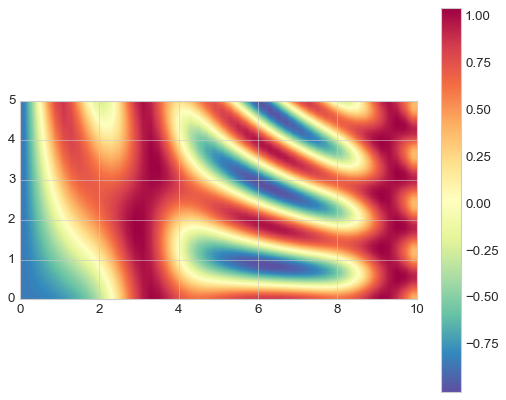

In [62]:
# Se necesitan especificar los límites, al igual que la esquina que será el origen (0,0)
# imshow interpreta la malla como si existiera un efecto de escalado horizontal
plt.imshow(Z, extent=[0, 10, 0, 5], origin='lower', cmap='Spectral_r')
plt.colorbar()

#### Combinaciones entre variantes ####

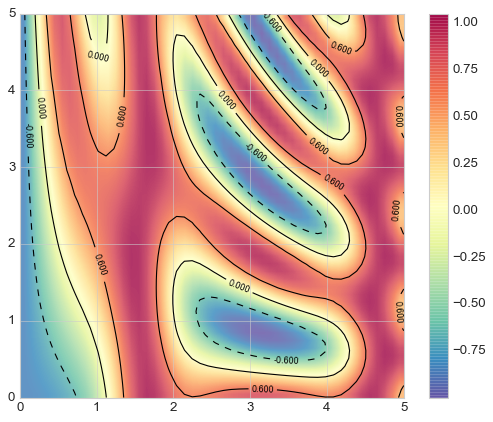

In [63]:
fig = plt.figure()
# Primero el gráfico de contornos es graficado y almacenado
contours = plt.contour(X, Y, Z, 3, colors='black')
# Se añaden etiquetas a los contornos
plt.clabel(contours, inline=True, fontsize=8)
# Luego se añaden los gradientes de color, junto con un alpha para no saturar
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
          cmap='Spectral_r', alpha=0.8)
plt.colorbar()

In [64]:
IMG_URL = os.path.join(IMGS_FOLDER, 'mapa_top.png')
if not os.path.exists(IMG_URL): fig.savefig(IMG_URL)

### Más sobre Visualización ###
* Otras ibrerías de visualización: Seaborn, Plotly
* Otros tipos de gráficas: mapas choroplet, heatmaps, etc
* Gráficos interactivos
* Gráficos en 3D
* Geovisualización con pandasGIS
* Visualización de datos de lata dimensionalidad
* Visualización de datos basados en texto